In [1]:
from src.ocsvm.OneClassSVMClassifier import OneClassSVMClassifier
from src.ocsvm.OneClassSVMClassifier import OneClassSVMModel 
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
feature_names = iris.feature_names
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [4]:
X_scaled=X_scaled[:,:-2]

In [5]:
feature_names = feature_names[:-2]

In [6]:
feature_names

['sepal length (cm)', 'sepal width (cm)']

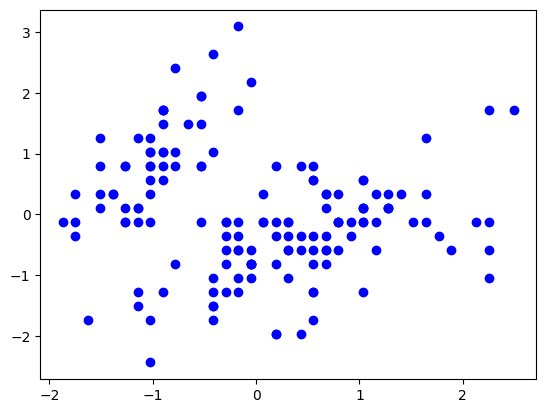

In [7]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], color='b');

In [28]:
ocsvm = OneClassSVMModel(nu=0.1, gamma=0.3)

In [29]:
x_data = torch.tensor(X_scaled)

In [30]:
decision, y_pred = ocsvm.fit(x_data)
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [31]:
classifier = OneClassSVMClassifier(x_data, nu=0.1, gamma=0.3, num_inducing_points=100)

In [32]:
classifier.fit()

(array([ 1.70031177e-02,  1.62579202e-02,  1.31935711e-02,  1.06751453e-02,
         1.53463417e-02,  1.61980924e-02,  6.16070686e-03,  1.64495428e-02,
        -1.71809081e-08,  1.62114589e-02,  1.80365619e-02,  1.34680882e-02,
         1.54334759e-02, -5.61174406e-03,  7.69047356e-03, -3.58323919e-02,
         1.61980924e-02,  1.70031177e-02,  1.45871201e-02,  1.40129904e-02,
         1.29984453e-02,  1.61150931e-02, -1.63558136e-03,  1.59429899e-02,
         1.34680882e-02,  1.61937299e-02,  1.64495428e-02,  1.69878600e-02,
         1.59206742e-02,  1.31935711e-02,  1.54403939e-02,  1.29984453e-02,
         9.64578288e-08, -4.51874348e-03,  1.62114589e-02,  1.61813806e-02,
         1.33391171e-02,  1.27233509e-02,  1.04076160e-03,  1.65592057e-02,
         1.61932083e-02, -2.03151544e-02, -8.54266826e-08,  1.61932083e-02,
         1.40129904e-02,  1.54334759e-02,  1.40129904e-02,  1.00251411e-02,
         1.82378801e-02,  1.63712138e-02,  1.17219137e-02,  1.23048434e-03,
         1.1

In [33]:
decision, y_pred = classifier.decision()
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [34]:
counts = {1: np.sum(y_pred == 1), -1: np.sum(y_pred == -1)}
total = len(y_pred)
percentages = {key: (count / total) * 100 for key, count in counts.items()}

results = {key: {"count": counts[key], "percentage": percentages[key]} for key in counts}

print(results)

{1: {'count': 132, 'percentage': 88.0}, -1: {'count': 18, 'percentage': 12.0}}


In [50]:
indices = [i for i, value in enumerate(y_pred) if value == -1]
indices

[8, 13, 15, 22, 33, 41, 42, 56, 60, 68, 87, 100, 109, 117, 118, 122, 131, 135]

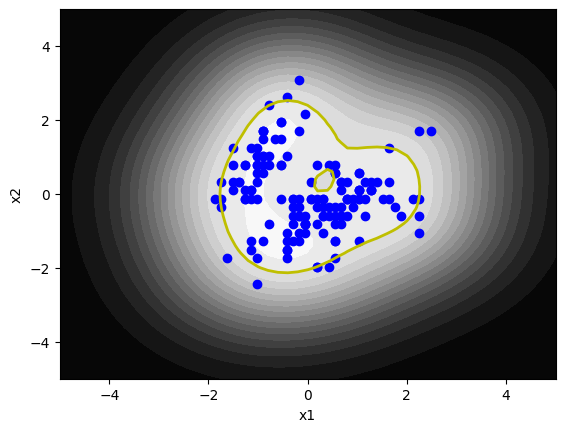

In [36]:
classifier.plot()

In [37]:
classifier.model.rho

0.23819003990070417

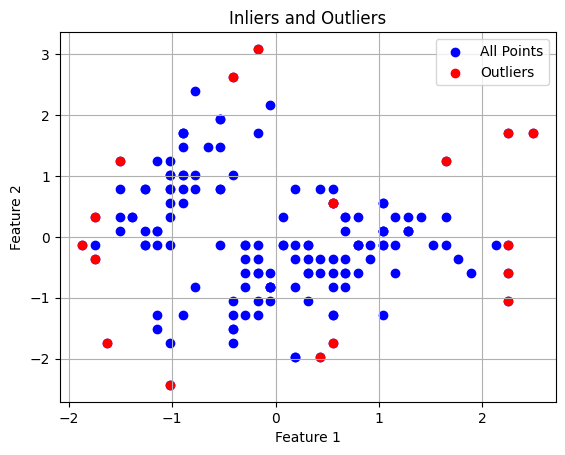

In [38]:
plt.scatter(x_data[:, 0], x_data[:, 1], color='blue', label='All Points')
outliers = x_data[indices]
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Inliers and Outliers')
plt.legend()
plt.grid()
plt.show()

In [49]:
outlier_features = x_data[indices]
outlier_features

tensor([[-1.7489, -0.3622],
        [-1.8700, -0.1320],
        [-0.1737,  3.0908],
        [-1.5065,  1.2492],
        [-0.4160,  2.6304],
        [-1.6277, -1.7434],
        [-1.7489,  0.3284],
        [ 0.5533,  0.5586],
        [-1.0218, -2.4339],
        [ 0.4322, -1.9736],
        [ 0.5533, -1.7434],
        [ 0.5533,  0.5586],
        [ 1.6438,  1.2492],
        [ 2.2497,  1.7096],
        [ 2.2497, -1.0528],
        [ 2.2497, -0.5924],
        [ 2.4920,  1.7096],
        [ 2.2497, -0.1320]], dtype=torch.float64)

index 15 in the dataset is a clear outlier and the reason should be beacsue of feature 2 i.e sepal width

In [51]:
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)

In [52]:
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
100%|██████████| 3/3 [00:00<00:00, 1969.77it/s]


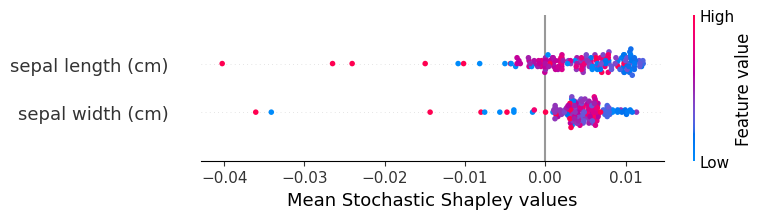

In [89]:
from src.utils.visualisation.deterministic_values import summary_plot,bar_plot
mean_stochastic_shapley_values = ocsvm_shap.return_deterministic_shapley_values()
summary_plot(mean_stochastic_shapley_values, x_data, feature_names=feature_names)
plt.xlabel("Mean Stochastic Shapley values")
plt.show()

In [93]:
x_data[15]

tensor([-0.1737,  3.0908], dtype=torch.float64)

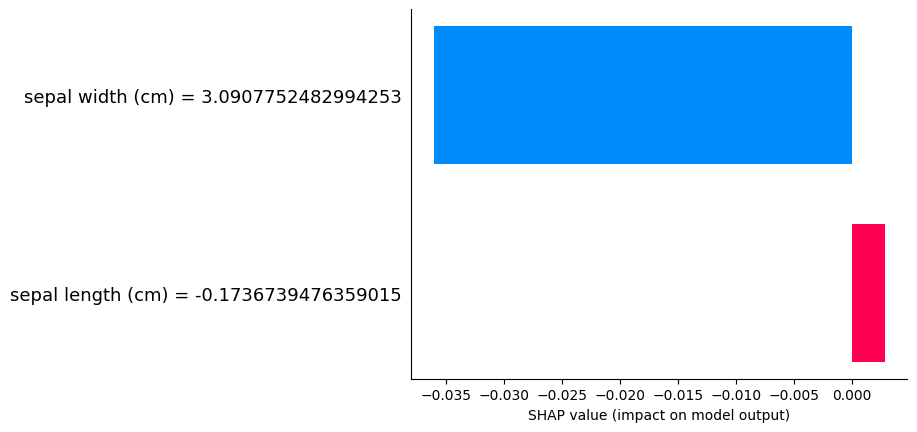

In [95]:
bar_plot(mean_stochastic_shapley_values.T[15], x_data[15], feature_names = feature_names)

## usking sklearn

In [42]:
from sklearn.svm import OneClassSVM
from sklearn.gaussian_process.kernels import RBF
clf = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.3, tol=1e-5)

In [43]:
clf.fit(x_data)

OneClassSVM(gamma=0.3, nu=0.1, tol=1e-05)

In [44]:
y_pred_sklearn = clf.predict(x_data)
y_pred_sklearn.shape

(150,)

In [45]:
x_data.shape

torch.Size([150, 2])

In [46]:
rho_sklearn = -clf.intercept_[0]
rho_sklearn

3.572858608528657

In [47]:
num_outliers = np.sum(y_pred_sklearn == -1)
num_outliers

15

In [ ]:
indices = [i for i, value in enumerate(y_pred) if value == -1]
len(indices)